In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import cdm_etl as etl

In [3]:
df=pd.read_csv("./data/train_data.csv")

In [4]:
#list(df.columns)

In [5]:
fields=["event_id",
 "time_to_tca",
 "miss_distance",
 "risk",
 "relative_speed",
 "relative_position_r",
"relative_position_t",
"relative_position_n",
"relative_velocity_r",
"relative_velocity_t",
"relative_velocity_n",
"mahalanobis_distance"]


In [6]:
remove_fields=[]
for column in list(df.columns):
    if column not in fields:
        remove_fields.append(column)


In [7]:
df=df.drop(columns=remove_fields, axis=1)

In [8]:
df.columns

Index(['event_id', 'time_to_tca', 'risk', 'miss_distance', 'relative_speed',
       'relative_position_r', 'relative_position_t', 'relative_position_n',
       'relative_velocity_r', 'relative_velocity_t', 'relative_velocity_n',
       'mahalanobis_distance'],
      dtype='object')

In [9]:
df['pc']=df['risk'].apply(lambda x: 10**x)


In [10]:
df["pc"].unique()

array([6.238e-11, 4.408e-11, 4.512e-11, ..., 8.651e-08, 7.787e-08,
       8.586e-08])

In [11]:
class Event():
    def __init__(self, event_id):
        self.event_id = event_id

class Cdm(Event):
    def __init__(self, event_id,time_to_tca, miss_distance,pc, relative_speed,
       relative_position_r, relative_position_t, relative_position_n,
       relative_velocity_r, relative_velocity_t, relative_velocity_n,
       mahalanobis_distance):
        super().__init__(event_id)

        self.time_to_tca = time_to_tca
        self.miss_distance = miss_distance
        self.pc = pc
        self.relative_position_r = relative_position_r
        self.relative_position_t = relative_position_t
        self.relative_position_n = relative_position_n
        self.relative_velocity_r = relative_velocity_r
        self.relative_velocity_t = relative_velocity_t
        self.relative_velocity_n = relative_velocity_n
        self.relative_speed = relative_speed
        self.mahalanobis_distance = mahalanobis_distance
    

In [12]:
# Create list of Event objects
events_list=[]
for event in  df.event_id.unique():
    events_list.append(Event(event))

In [13]:
# Create list of Cdm objects
cdm_list=[]
for row in df.index:
    cdm_object = Cdm(event_id=df["event_id"][row],
                time_to_tca = df["time_to_tca"][row],
                miss_distance = df["miss_distance"][row],
                pc = df["pc"][row],
                relative_position_r = df["relative_position_r"][row],
                relative_position_t = df["relative_position_t"][row],
                relative_position_n = df["relative_position_n"][row],
                relative_velocity_r = df["relative_velocity_r"][row],
                relative_velocity_t = df["relative_velocity_t"][row],
                relative_velocity_n = df["relative_velocity_n"][row],
                relative_speed = df["relative_speed"][row],
                mahalanobis_distance = df["mahalanobis_distance"][row]
              )
    cdm_list.append(cdm_object)


In [14]:
x=[]
y=[]
z=[]
for report in cdm_list:
    if report.event_id == 0:
        print(report.__dict__)
        x.append(-report.time_to_tca)
        y.append(report.miss_distance)
        z.append(report.relative_position_t)

{'event_id': 0, 'time_to_tca': 1.566798229166667, 'miss_distance': 14923.0, 'pc': 6.238e-11, 'relative_position_r': 453.8, 'relative_position_t': 5976.6, 'relative_position_n': -13666.8, 'relative_velocity_r': -7.2, 'relative_velocity_t': -12637.0, 'relative_velocity_n': -5525.9, 'relative_speed': 13792.0, 'mahalanobis_distance': 129.4309510080351}
{'event_id': 0, 'time_to_tca': 1.2074935069444446, 'miss_distance': 14544.0, 'pc': 4.4079999999999785e-11, 'relative_position_r': 474.3, 'relative_position_t': 5821.2, 'relative_position_n': -13319.8, 'relative_velocity_r': -7.0, 'relative_velocity_t': -12637.0, 'relative_velocity_n': -5525.9, 'relative_speed': 13792.0, 'mahalanobis_distance': 271.54042407269867}
{'event_id': 0, 'time_to_tca': 0.9521927430555556, 'miss_distance': 14475.0, 'pc': 4.511999999999973e-11, 'relative_position_r': 474.6, 'relative_position_t': 5796.2, 'relative_position_n': -13256.1, 'relative_velocity_r': -7.0, 'relative_velocity_t': -12637.0, 'relative_velocity_n'

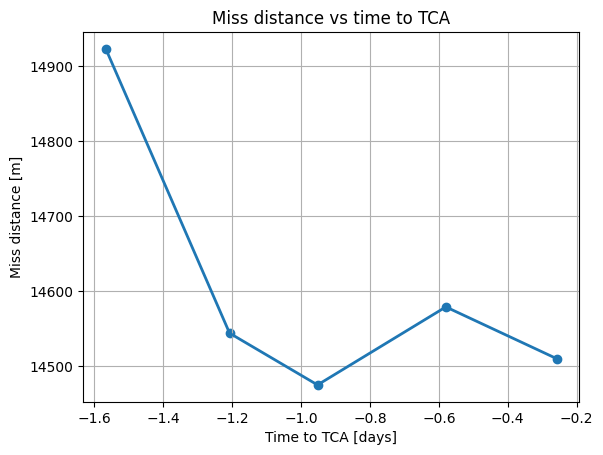

In [15]:
plt.scatter(x,y)
plt.plot(x, y, linewidth=2.0)
plt.grid(True)
plt.xlabel("Time to TCA [days]")
plt.ylabel("Miss distance [m]")
plt.title("Miss distance vs time to TCA")

plt.show()

Text(0.5, 1.0, 'Relative distance vs time to TCA')

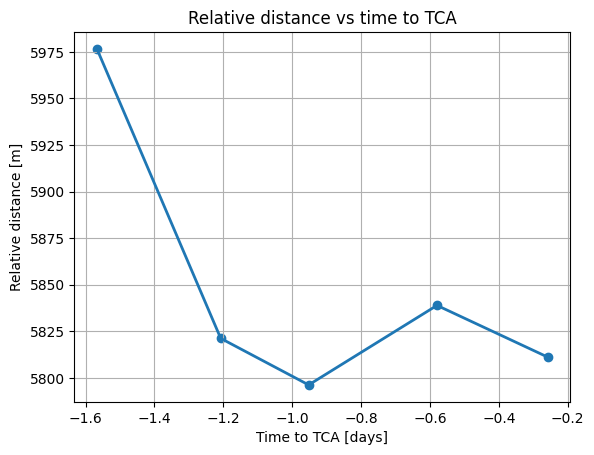

In [16]:
plt.scatter(x,z)
plt.plot(x, z, linewidth=2.0)
plt.grid(True)
plt.xlabel("Time to TCA [days]")
plt.ylabel("Relative distance [m]")
plt.title("Relative distance vs time to TCA")

In [17]:
def get_cdm_from_event_id(event):
    """Get cdm based on event_id

    Args:
        event (int): event_id
    """
    x1=[]
    #print(f"CDMs for event_id:{event}")
    for report in cdm_list:
        if report.event_id == event:
            #print(report.__dict__)
            x1.append(report.__dict__)
    return x1

In [18]:
output=get_cdm_from_event_id(1)

In [19]:
output

[{'event_id': 1,
  'time_to_tca': 6.530455104166666,
  'miss_distance': 2392.0,
  'pc': 2.7460000000000085e-08,
  'relative_position_r': 74.3,
  'relative_position_t': 2317.1,
  'relative_position_n': -589.4,
  'relative_velocity_r': 25.9,
  'relative_velocity_t': -847.8,
  'relative_velocity_n': -3328.2,
  'relative_speed': 3434.0,
  'mahalanobis_distance': 4.183398475973807},
 {'event_id': 1,
  'time_to_tca': 5.561646087962963,
  'miss_distance': 3587.0,
  'pc': 4.833999999999996e-10,
  'relative_position_r': 99.0,
  'relative_position_t': 3475.4,
  'relative_position_n': -885.1,
  'relative_velocity_r': 24.7,
  'relative_velocity_t': -847.8,
  'relative_velocity_n': -3328.2,
  'relative_speed': 3434.0,
  'mahalanobis_distance': 7.26771861745376},
 {'event_id': 1,
  'time_to_tca': 5.226503738425926,
  'miss_distance': 7882.0,
  'pc': 3.77999999999999e-08,
  'relative_position_r': -50.0,
  'relative_position_t': -7638.3,
  'relative_position_n': 1945.7,
  'relative_velocity_r': 36.8,


In [20]:
cdm_sorted=sorted(output, key=lambda x: x['time_to_tca'],reverse=True)
# last element is the closest to the TCA

In [21]:
cdm_sorted

[{'event_id': 1,
  'time_to_tca': 6.530455104166666,
  'miss_distance': 2392.0,
  'pc': 2.7460000000000085e-08,
  'relative_position_r': 74.3,
  'relative_position_t': 2317.1,
  'relative_position_n': -589.4,
  'relative_velocity_r': 25.9,
  'relative_velocity_t': -847.8,
  'relative_velocity_n': -3328.2,
  'relative_speed': 3434.0,
  'mahalanobis_distance': 4.183398475973807},
 {'event_id': 1,
  'time_to_tca': 5.561646087962963,
  'miss_distance': 3587.0,
  'pc': 4.833999999999996e-10,
  'relative_position_r': 99.0,
  'relative_position_t': 3475.4,
  'relative_position_n': -885.1,
  'relative_velocity_r': 24.7,
  'relative_velocity_t': -847.8,
  'relative_velocity_n': -3328.2,
  'relative_speed': 3434.0,
  'mahalanobis_distance': 7.26771861745376},
 {'event_id': 1,
  'time_to_tca': 5.226503738425926,
  'miss_distance': 7882.0,
  'pc': 3.77999999999999e-08,
  'relative_position_r': -50.0,
  'relative_position_t': -7638.3,
  'relative_position_n': 1945.7,
  'relative_velocity_r': 36.8,


In [22]:
cdm_sorted

[{'event_id': 1,
  'time_to_tca': 6.530455104166666,
  'miss_distance': 2392.0,
  'pc': 2.7460000000000085e-08,
  'relative_position_r': 74.3,
  'relative_position_t': 2317.1,
  'relative_position_n': -589.4,
  'relative_velocity_r': 25.9,
  'relative_velocity_t': -847.8,
  'relative_velocity_n': -3328.2,
  'relative_speed': 3434.0,
  'mahalanobis_distance': 4.183398475973807},
 {'event_id': 1,
  'time_to_tca': 5.561646087962963,
  'miss_distance': 3587.0,
  'pc': 4.833999999999996e-10,
  'relative_position_r': 99.0,
  'relative_position_t': 3475.4,
  'relative_position_n': -885.1,
  'relative_velocity_r': 24.7,
  'relative_velocity_t': -847.8,
  'relative_velocity_n': -3328.2,
  'relative_speed': 3434.0,
  'mahalanobis_distance': 7.26771861745376},
 {'event_id': 1,
  'time_to_tca': 5.226503738425926,
  'miss_distance': 7882.0,
  'pc': 3.77999999999999e-08,
  'relative_position_r': -50.0,
  'relative_position_t': -7638.3,
  'relative_position_n': 1945.7,
  'relative_velocity_r': 36.8,


In [23]:
cdm_sorted.pop()

{'event_id': 1,
 'time_to_tca': 3.570013078703704,
 'miss_distance': 26899.0,
 'pc': 5.647999999999989e-10,
 'relative_position_r': -82.0,
 'relative_position_t': -26067.0,
 'relative_position_n': 6638.2,
 'relative_velocity_r': 56.8,
 'relative_velocity_t': -847.8,
 'relative_velocity_n': -3328.2,
 'relative_speed': 3434.0,
 'mahalanobis_distance': 62.058087054076864}

In [24]:
def get_closest_cdm_to_tca_by_event_id(event):    
    list_of_cdm_of_event=get_cdm_from_event_id(event)
    cdm_sorted=sorted(list_of_cdm_of_event, key=lambda x: x['time_to_tca'],reverse=True)
    closest_cdm_to_tca=cdm_sorted.pop()
    #print(f"CDM closest to TCA for event_id: {event}")
    #print(closest_cdm_to_tca)
    return closest_cdm_to_tca

In [25]:
get_closest_cdm_to_tca_by_event_id(1)

{'event_id': 1,
 'time_to_tca': 3.570013078703704,
 'miss_distance': 26899.0,
 'pc': 5.647999999999989e-10,
 'relative_position_r': -82.0,
 'relative_position_t': -26067.0,
 'relative_position_n': 6638.2,
 'relative_velocity_r': 56.8,
 'relative_velocity_t': -847.8,
 'relative_velocity_n': -3328.2,
 'relative_speed': 3434.0,
 'mahalanobis_distance': 62.058087054076864}

In [26]:
events_list_dict=[]
for event in events_list:
    events_list_dict.append(event.__dict__)

In [27]:
def classify_with_last_available_cdm(event:int,pc:float=0.00001,md:float=400):
    cdm=get_closest_cdm_to_tca_by_event_id(event)
    if  cdm.get("pc") > pc and cdm.get("miss_distance") < md:
        events_list_dict[event]["maneuver_required"]=True
    else:
        events_list_dict[event]["maneuver_required"]=False
    return events_list_dict[event]


In [28]:
classify_with_last_available_cdm(2)

{'event_id': 2, 'maneuver_required': False}

In [29]:
len(events_list)

13154

In [30]:
len(cdm_list)

162634

In [31]:
for event in range(len(events_list)):
    classify_with_last_available_cdm(event)


In [32]:
list_of_events_that_requires_maneuver=[]
for event in range(len(events_list)):
    if events_list_dict[event].get("maneuver_required"):
        list_of_events_that_requires_maneuver.append(events_list_dict[event])

In [33]:
list_of_events_that_requires_maneuver

[{'event_id': 283, 'maneuver_required': True},
 {'event_id': 1148, 'maneuver_required': True},
 {'event_id': 2563, 'maneuver_required': True},
 {'event_id': 2958, 'maneuver_required': True},
 {'event_id': 3555, 'maneuver_required': True},
 {'event_id': 5185, 'maneuver_required': True},
 {'event_id': 6341, 'maneuver_required': True},
 {'event_id': 6561, 'maneuver_required': True},
 {'event_id': 7629, 'maneuver_required': True},
 {'event_id': 8664, 'maneuver_required': True},
 {'event_id': 8767, 'maneuver_required': True},
 {'event_id': 8863, 'maneuver_required': True},
 {'event_id': 9383, 'maneuver_required': True},
 {'event_id': 9411, 'maneuver_required': True},
 {'event_id': 10510, 'maneuver_required': True},
 {'event_id': 11953, 'maneuver_required': True},
 {'event_id': 12638, 'maneuver_required': True}]

In [34]:
get_cdm_from_event_id(1148)

[{'event_id': 1148,
  'time_to_tca': 6.624041608796297,
  'miss_distance': 210.0,
  'pc': 0.0052949999999999985,
  'relative_position_r': -1.8,
  'relative_position_t': -28.8,
  'relative_position_n': 208.7,
  'relative_velocity_r': -35.9,
  'relative_velocity_t': -14847.1,
  'relative_velocity_n': -2032.8,
  'relative_speed': 14985.0,
  'mahalanobis_distance': 2.761335853117751},
 {'event_id': 1148,
  'time_to_tca': 6.190766087962964,
  'miss_distance': 206.0,
  'pc': 0.002857999999999999,
  'relative_position_r': 6.8,
  'relative_position_t': -26.5,
  'relative_position_n': 204.5,
  'relative_velocity_r': -35.9,
  'relative_velocity_t': -14847.2,
  'relative_velocity_n': -2032.8,
  'relative_speed': 14985.0,
  'mahalanobis_distance': 3.04703911117885},
 {'event_id': 1148,
  'time_to_tca': 5.876899803240741,
  'miss_distance': 166.0,
  'pc': 0.015579999999999997,
  'relative_position_r': 4.4,
  'relative_position_t': -23.5,
  'relative_position_n': 164.5,
  'relative_velocity_r': -35.